In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_train = pd.read_csv('./train.csv')
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

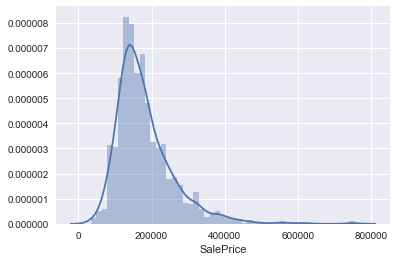

In [7]:
# 描述性统计分析
df_train['SalePrice'].describe()
sns.distplot(df_train['SalePrice']);

In [8]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


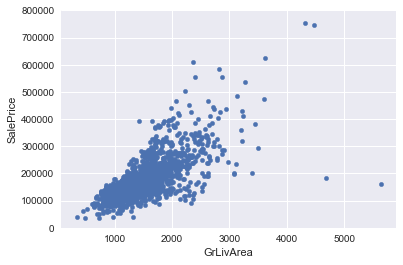

In [10]:
#房价的相关变量分析
#数字型变量的关系
#1.‘Grlivarea’ 与 ‘SalePrice’ 散点图
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

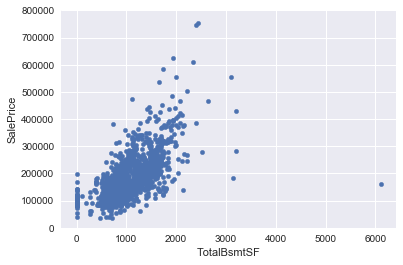

In [11]:
#2.‘TotalBsmtSF’ 与 ‘SalePrice’散点图
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

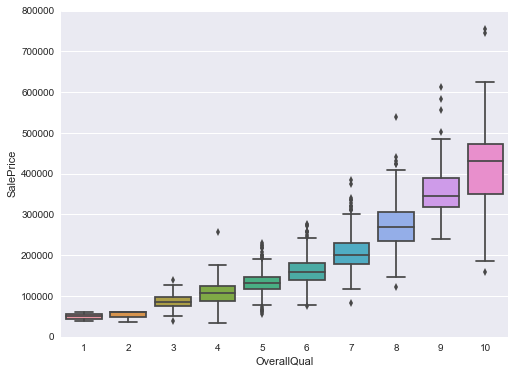

In [15]:
#类别型变量的关系
#1.‘OverallQual’与‘SalePrice’箱型图
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

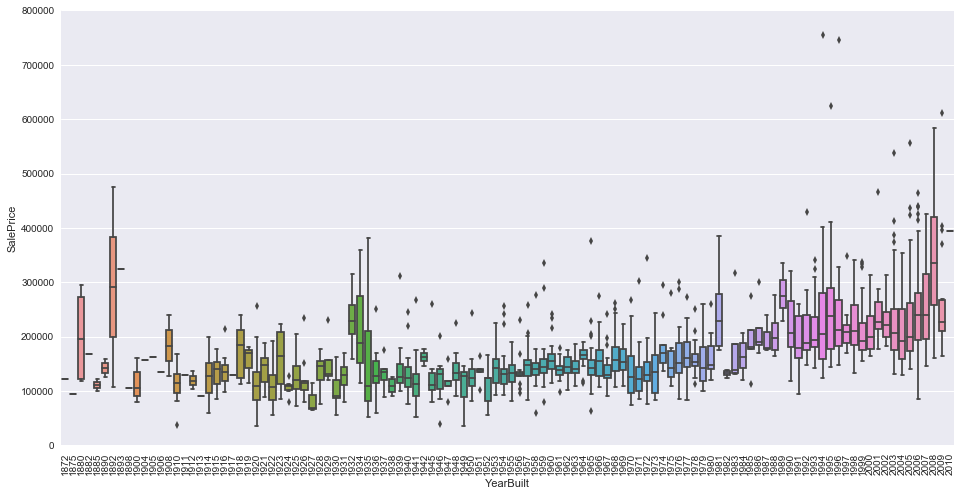

In [13]:
#2.‘YearBuilt’与‘SalePrice’箱型图
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);

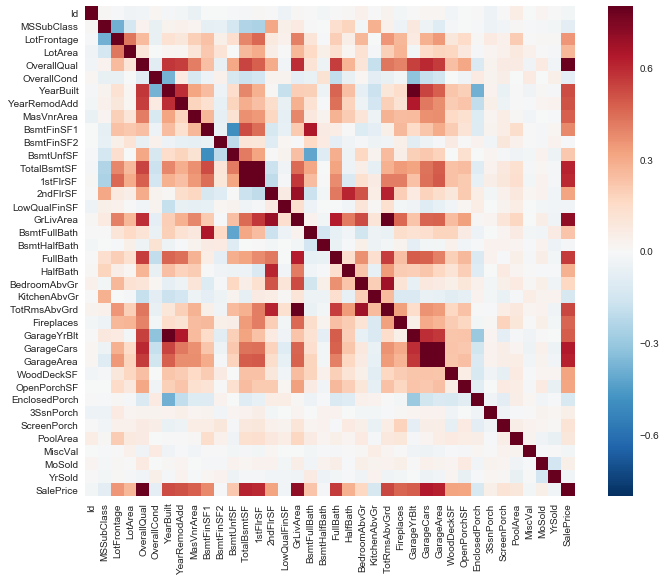

In [16]:
#客观分析
#1. 相关系数矩阵
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

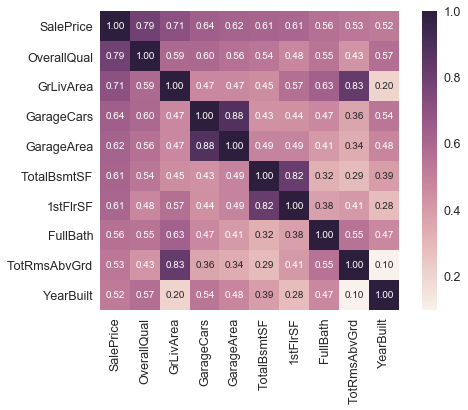

In [17]:
#2.’SalePrice’ 相关系数矩阵
k = 10 #number ofvariables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

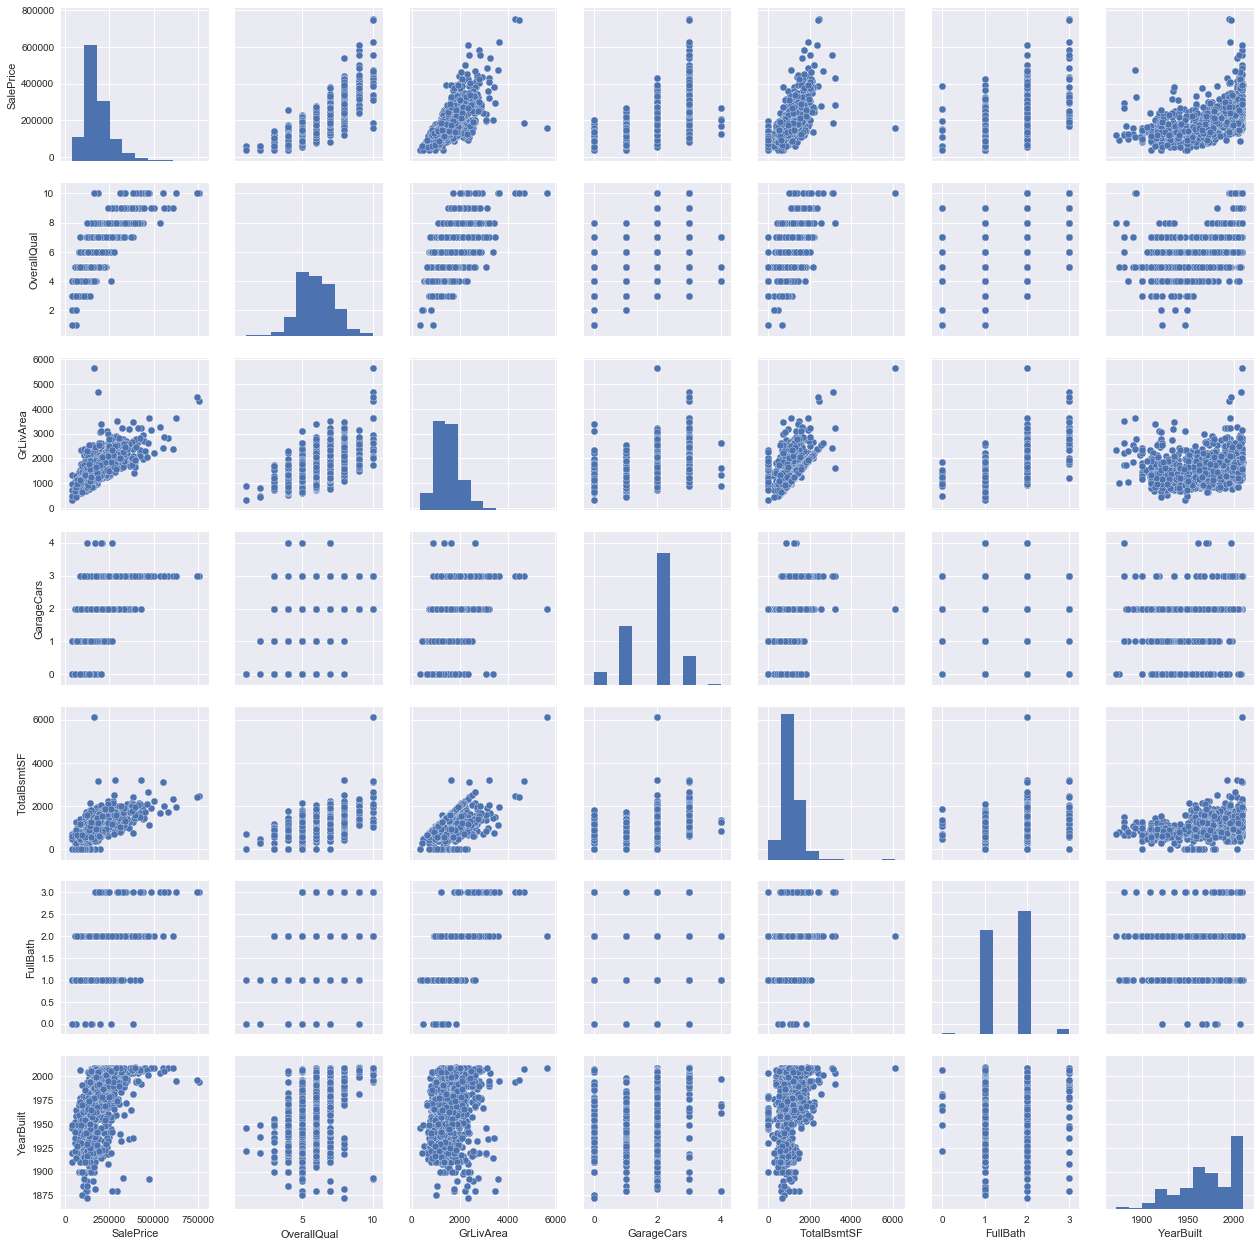

In [18]:
#3.’SalePrice’ 和相关变量之间的散点图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [19]:
#缺失数据处理
#当超过15%的数据都缺失的时候，我们应该删掉相关变量且假设该变量并不存在。
total= df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
#由于’Electrical’中只有一个损失的观察值，所以我们删除这个观察值，但是保留这一变量。
df_train= df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train= df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #justchecking that there's no missing data missing...

0

In [21]:
#异常值分析
#1.单因素分析
saleprice_scaled= StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of thedistribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of thedistribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


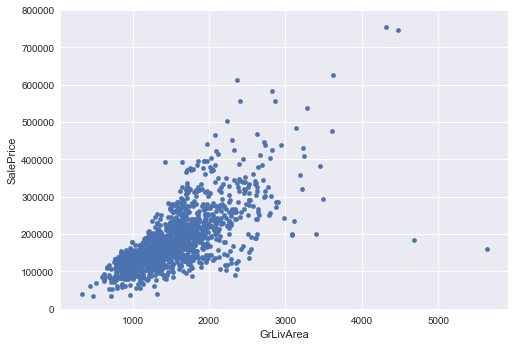

In [22]:
#2.双变量分析
# 1.‘GrLivArea’和’SalePrice’双变量分析
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [23]:
#有两个离群的’GrLivArea’ 值很高的数据，我们可以推测出现这种情况的原因。或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。
#图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。
#删除点
df_train.sort_values(by = 'GrLivArea',ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

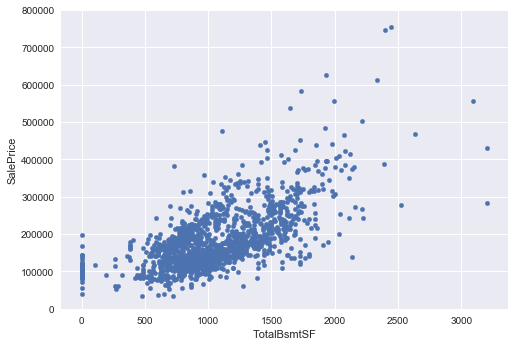

In [24]:
# 2.‘TotalBsmtSF’和’SalePrice’双变量分析
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

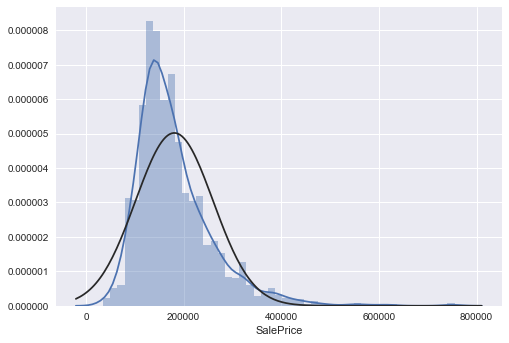

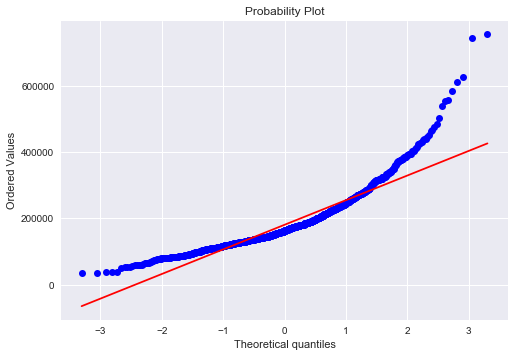

In [25]:
# “房价”到底是谁？
# 这个问题的答案，需要我们验证根据数据基础进行多元分析的假设。
# 我们已经进行了数据清洗，并且发现了“SalePrice”的很多信息，现在我们要更进一步理解‘SalePrice’如何遵循统计假设，可以让我们应用多元技术。
# 应该测量4个假设量：
# 1.正态性
# 2.同方差性
# 3.线性
# 4.相关错误缺失
#正态性
# 1.‘SalePrice’
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

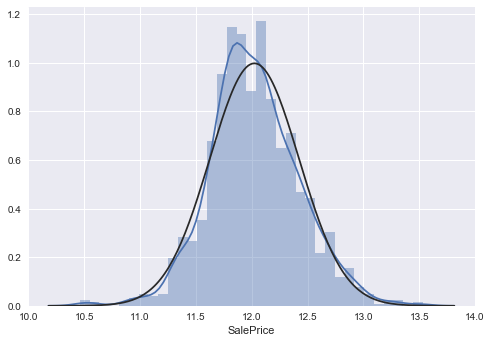

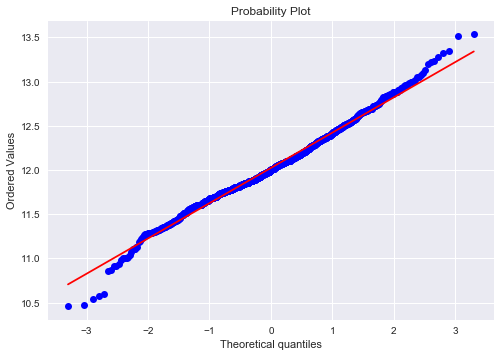

In [26]:
#可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。
#可以用对数变换来解决这个问题
#进行对数变换
df_train['SalePrice']= np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

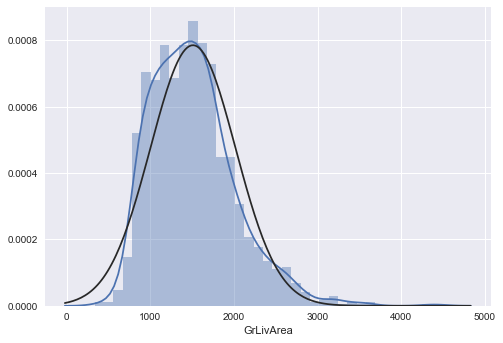

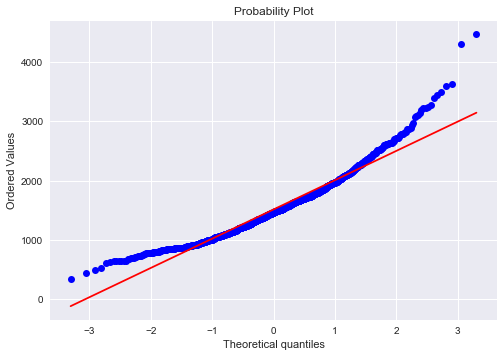

In [27]:
# 2.’GrLivArea’
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

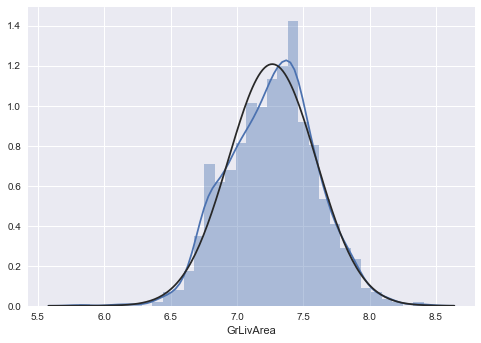

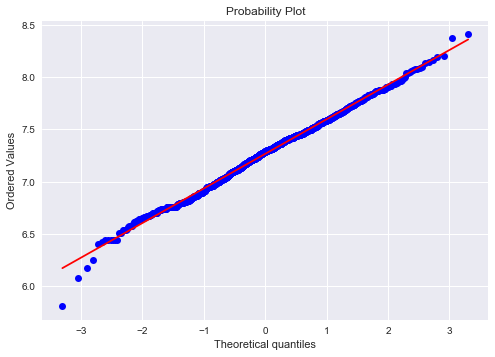

In [28]:
#进行对数变换
df_train['GrLivArea']= np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

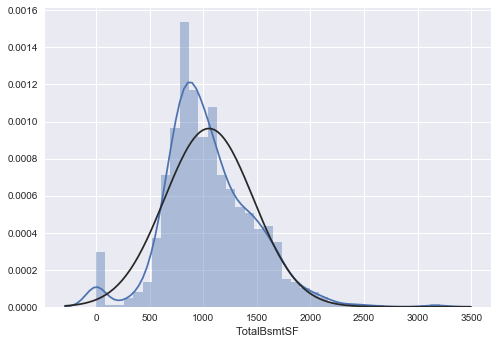

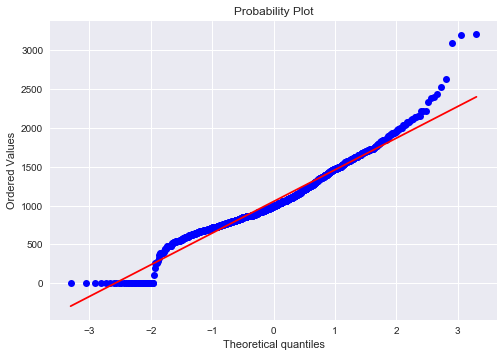

In [29]:
# 3.‘TotalBsmtSF’
sns.distplot(df_train['TotalBsmtSF'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'],plot=plt)

In [33]:
#从图中可以看出：1.显示出了偏度，2.大量为0的观察值（没有地下室的房屋），3.含0的数据无法进行对数变换
#我们建立了一个变量，可以得到有没有地下室的影响值（二值变量），我们选择忽略零值，只对非零值进行对数变换。这样我们既可以变换数据，也不会损失有没有地下室的影响。
df_train['HasBsmt']= pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train['TotalBsmtSF']

0       1.909879
1       1.965776
2       1.920501
3       1.891309
4       1.952057
5       1.899058
6       2.005541
7       1.947253
8       1.925498
9       1.931335
10      1.938306
11      1.955722
12      1.919220
13      1.989136
14      1.964773
15      1.905658
16      1.933222
17           NaN
18      1.948152
19      1.936775
20      1.953659
21      1.865129
22      2.012591
23      1.938306
24      1.941045
25      1.995554
26      1.917275
27      2.006969
28      1.988216
29      1.833194
          ...   
1430    1.886430
1431    1.926414
1432    1.869671
1433    1.923024
1434    1.949678
1435    1.971944
1436    1.911256
1437    2.023706
1438    1.919220
1439    1.838916
1440    1.852655
1441    1.908487
1442    1.935082
1443    1.925498
1444    1.982355
1445    1.902400
1446    1.957278
1447    1.961025
1448    1.844974
1449    1.863416
1450    1.916620
1451    1.996160
1452    1.841256
1453    1.951435
1454    1.961140
1455    1.925651
1456    1.993453
1457    1.9529

ZeroDivisionError: float division by zero

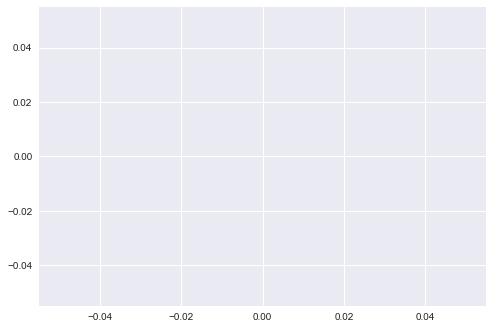

In [38]:
#进行对数变换
df_train['TotalBsmtSF']= np.log(df_train['TotalBsmtSF'])
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

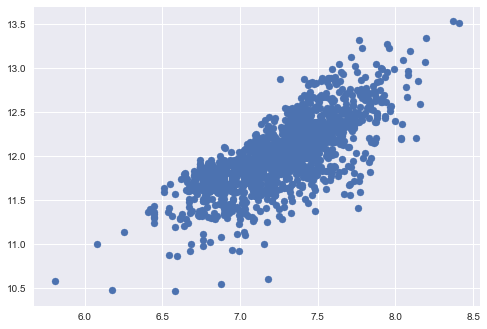

In [34]:
#同方差性
#1. ‘SalePrice’ 和 ‘GrLivArea’同方差性
plt.scatter(df_train['GrLivArea'],df_train['SalePrice']);

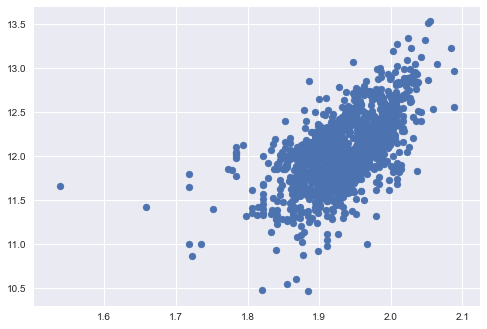

In [35]:
#2.’SalePrice’ with ‘TotalBsmtSF’同方差性
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [39]:
#虚拟变量
# 将类别变量转换为虚拟变量：
df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0
